In [1]:
import numpy as np

import mne
from mne.preprocessing import EOGRegression

In [10]:
raw = mne.io.read_raw_gdf("D:/Users/User/Documents/TCC Pós Graduação/src/datasources/BCICIV_2b_gdf/B0101T.gdf",preload=True, eog=['EOG:ch01', 'EOG:ch02', 'EOG:ch03'],)

Extracting EDF parameters from D:\Users\User\Documents\TCC Pós Graduação\src\datasources\BCICIV_2b_gdf\B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


C:\Users\Vinícius\AppData\Local\Temp\ipykernel_14872\1925710719.py:1: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf("D:/Users/User/Documents/TCC Pós Graduação/src/datasources/BCICIV_2b_gdf/B0101T.gdf",preload=True, eog=['EOG:ch01', 'EOG:ch02', 'EOG:ch03'],)


In [11]:
raw.ch_names

['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

In [12]:
raw.load_data()

<RawGDF | B0101T.gdf, 6 x 604803 (2419.2 s), ~27.7 MB, data loaded>

In [13]:
raw.set_eeg_reference("average")

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawGDF | B0101T.gdf, 6 x 604803 (2419.2 s), ~27.7 MB, data loaded>

In [14]:
raw.filter(0.3, 40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 2751 samples (11.004 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


<RawGDF | B0101T.gdf, 6 x 604803 (2419.2 s), ~27.7 MB, data loaded>

In [15]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770']


In [16]:
events

(array([[     0,      0,      8],
        [   499,      0,      6],
        [ 16749,      0,      7],
        [ 32999,      0,      5],
        [ 37999,      0,      4],
        [ 42999,      0,      3],
        [ 47999,      0,      2],
        [ 52251,      0,      8],
        [ 55139,      0,      9],
        [ 55889,      0,     10],
        [ 57499,      0,      9],
        [ 58249,      0,     11],
        [ 62067,      0,      9],
        [ 62817,      0,     10],
        [ 64104,      0,      9],
        [ 64854,      0,     11],
        [ 72981,      0,      9],
        [ 73731,      0,     11],
        [ 75188,      0,      9],
        [ 75938,      0,     11],
        [ 77589,      0,      9],
        [ 78339,      0,     11],
        [ 88500,      0,      9],
        [ 88500,      0,      1],
        [ 89250,      0,     11],
        [ 90934,      0,      9],
        [ 91684,      0,     10],
        [ 93193,      0,      9],
        [ 93943,      0,     11],
        [ 9995

276 0x0114 Idling EEG (eyes open)
277 0x0115 Idling EEG (eyes closed)
768 0x0300 Start of a trial
769 0x0301 Cue onset left (class 1)
770 0x0302 Cue onset right (class 2)
781 0x030D BCI feedback (continuous)
783 0x030F Cue unknown
1023 0x03FF Rejected trial
1077 0x0435 Horizontal eye movement
1078 0x0436 Vertical eye movement
1079 0x0437 Eye rotation
1081 0x0439 Eye blinks
32766 0x7FFE Start of a new run

In [17]:
event_id = {
 'reject':1,
 'Horizontal eye move':2,
 'Vertical eye movement':3,
 'Eye rotation':4,
 'Eye blinks':5,
 'Idling EEG (eyes open)':6,
 'Idling EEG (eyes closed)':7,
 'Start of a new run':8,
 'Start of a trial':9,
 'Cue onset left (class 1)':10,
 'Cue onset right (class 2)':11,
}
epochs = mne.Epochs(raw, events[0], event_id=[10,11],preload=True,on_missing ='warn')

Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 176 original time points ...
0 bad epochs dropped


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


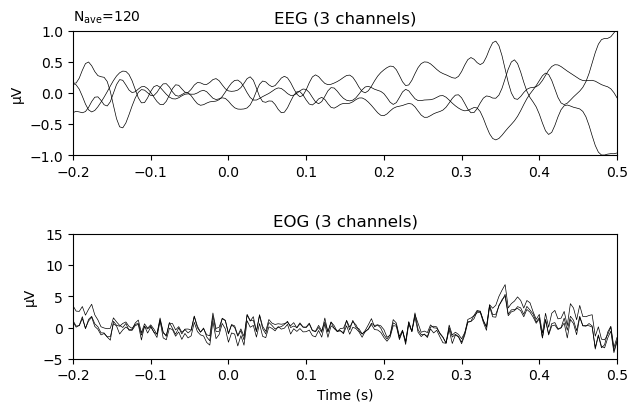

In [18]:
plot_kwargs = dict(picks="all", ylim=dict(eeg=(-1, 1), eog=(-5, 15)))

# plot the evoked for the EEG and the EOG sensors
fig = epochs.average("all").plot(**plot_kwargs)
fig.set_size_inches(6, 6)

In [19]:
model_plain = EOGRegression(picks="eeg", picks_artifact="eog").fit(epochs)


No projector specified for this dataset. Please consider the method self.add_proj.


In [20]:
# fig = model_plain.plot(vlim=(None, 0.4))  # regression coefficients as topomap
# fig.set_size_inches(3, 2)

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


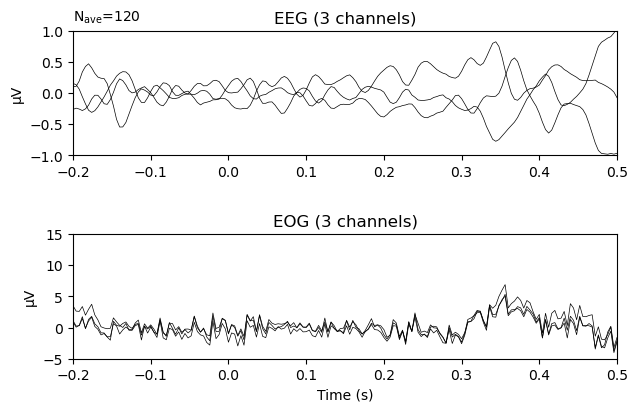

In [21]:
epochs_clean_plain = model_plain.apply(epochs)
# After regression, we should redo the baseline correction
epochs_clean_plain.apply_baseline()
# Show the evoked potential computed on the corrected data
fig = epochs_clean_plain.average("all").plot(**plot_kwargs)
fig.set_size_inches(6, 6)

In [22]:
# create epochs with the evoked subtracted out
epochs_sub = epochs.copy().subtract_evoked()


Subtracting Evoked from Epochs
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    The following channels are not included in the subtraction: EOG:ch02, EOG:ch03, EOG:ch01
[done]


In [23]:

# perform regression
model_sub = EOGRegression(picks="eeg", picks_artifact="eog").fit(epochs_sub)


No projector specified for this dataset. Please consider the method self.add_proj.


In [24]:
# fig = model_sub.plot(vlim=(None, 0.4))
# fig.set_size_inches(3, 2)


No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


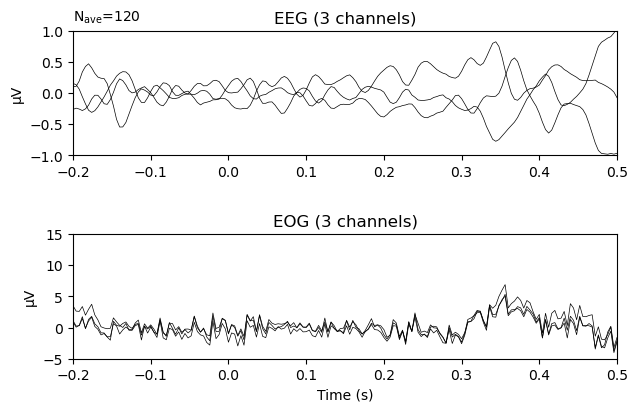

In [25]:

# apply the regression coefficients to the original epochs
epochs_clean_sub = model_plain.apply(epochs).apply_baseline()
fig = epochs_clean_sub.average("all").plot(**plot_kwargs)
fig.set_size_inches(6, 6)

Using EOG channels: EOG:ch01, EOG:ch02, EOG:ch03
EOG channel index for this subject is: [3 4 5]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 40.25 Hz)
- Filter length: 2500 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 235 significant peaks
Number of EOG events detected: 235
Not setting metadata
235 matching events found
No baseline correction applied
Using data from preloaded Raw for 235 events and 251 original time points ...
0 bad epochs dropped
Using EOG channels: EOG:ch01, EOG:ch02, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 392 significant peaks
Number of EOG events detected: 392
Not setting metadata
392 matching events found
No baseline correction applied
Using data from preloaded Raw for 392 events and 251 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


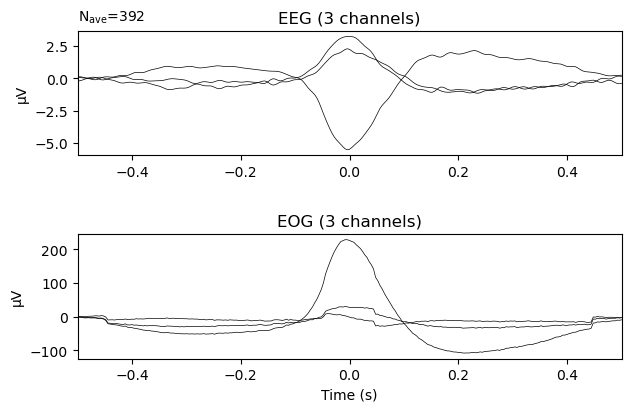

In [37]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, l_freq=0.5, h_freq=40)
eog_epochs = mne.preprocessing.create_eog_epochs(raw, l_freq=1, h_freq=10)
# We need to explicitly specify that we want to average the EOG channel too.
eog_evoked = eog_epochs.average("all")
eog_evoked.plot("all")
fig.set_size_inches(6, 6)


In [32]:

# perform regression on the evoked blink response
model_evoked = EOGRegression(picks="eeg", picks_artifact="eog").fit(eog_evoked)
# fig = model_evoked.plot(vlim=(None, 0.4))
# fig.set_size_inches(3, 2)


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


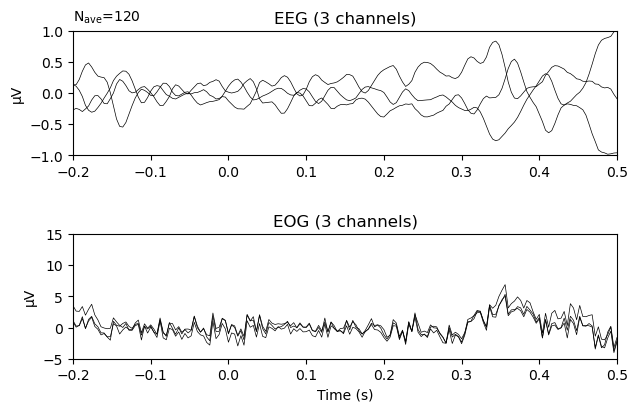

In [33]:

# apply the regression coefficients to the original epochs
epochs_clean_evoked = model_evoked.apply(epochs).apply_baseline()
fig = epochs_clean_evoked.average("all").plot(**plot_kwargs)
fig.set_size_inches(6, 6)


No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)


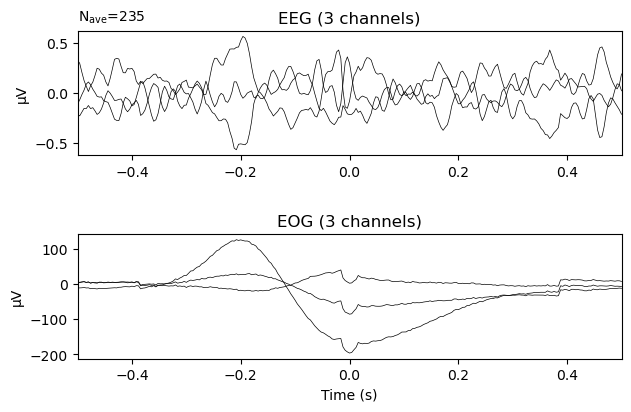

In [34]:

# for good measure, also show the effect on the blink evoked
eog_evoked_clean = model_evoked.apply(eog_evoked)
eog_evoked_clean.apply_baseline()
eog_evoked_clean.plot("all")
fig.set_size_inches(6, 6)

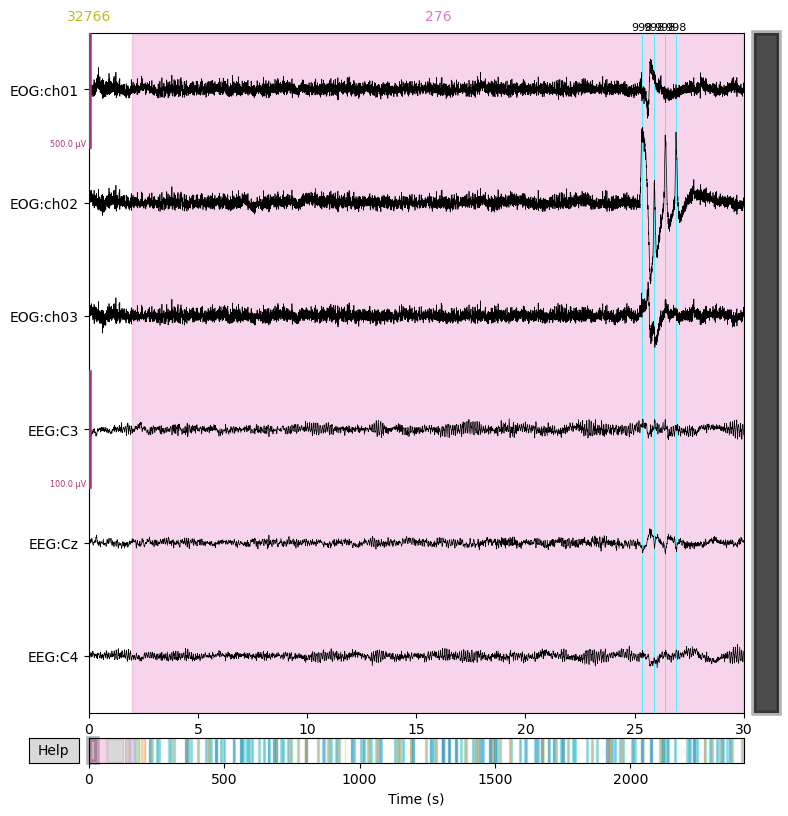

No projector specified for this dataset. Please consider the method self.add_proj.


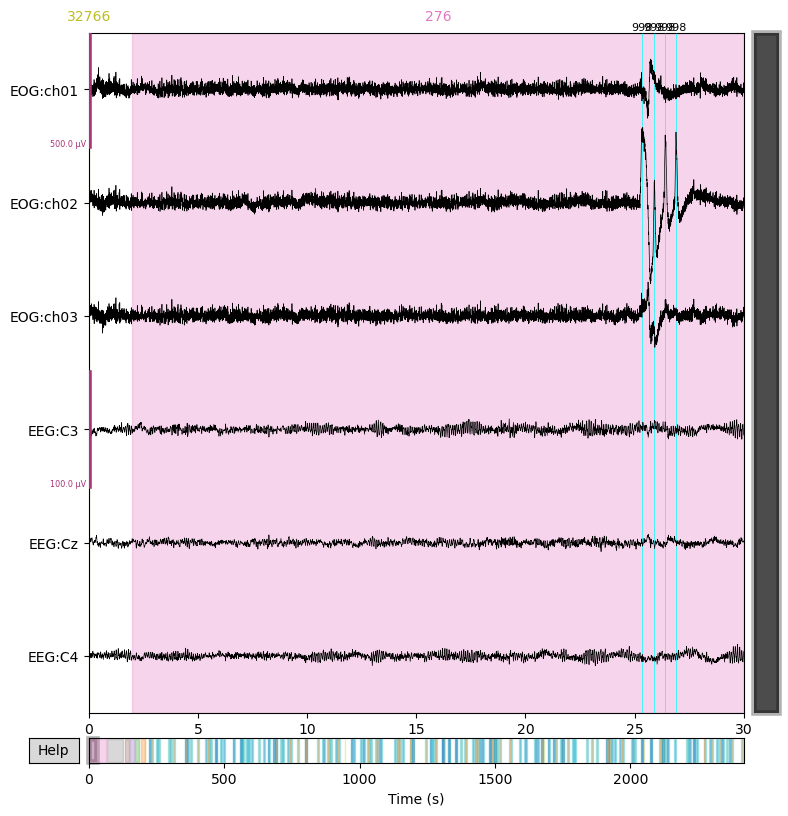

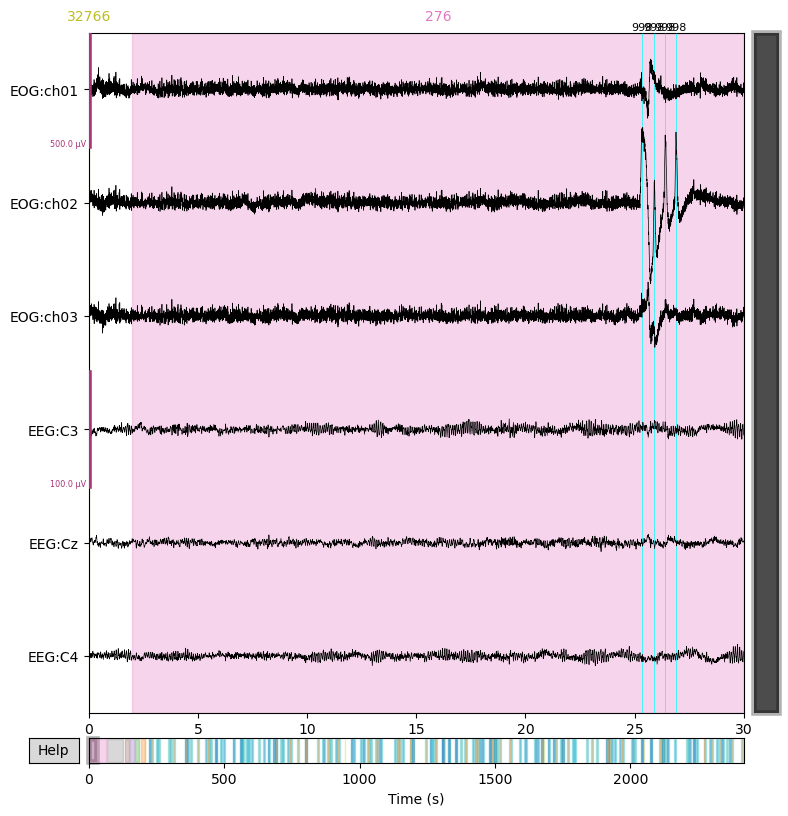

In [38]:
order = np.concatenate(
    [  # plotting order: EOG first, then EEG
        mne.pick_types(raw.info, meg=False, eog=True),
        mne.pick_types(raw.info, meg=False, eeg=True),
    ]
)
raw_kwargs = dict(
    events=eog_epochs.events,
    order=order,
    start=400,
    duration=30,
    n_channels=10,
    scalings=dict(eeg=50e-6, eog=250e-6),
)

# plot original data
raw.plot(**raw_kwargs)

# regress (using coefficients computed previously) and plot
raw_clean = model_evoked.apply(raw)
raw_clean.plot(**raw_kwargs)

In [58]:
epochs_clean_plain[11].to_data_frame()

,time,condition,epoch,EEG:C3,EEG:Cz,EEG:C4,EOG:ch01,EOG:ch02,EOG:ch03
0,-0.200,10,32,0.099014,0.940707,-1.039721,11.908619,10.837496,7.018552
1,-0.196,10,32,0.075085,1.336422,-1.411507,-1.824500,-0.942469,-5.890581
2,-0.192,10,32,-0.361383,1.550952,-1.189569,21.338695,22.159690,16.662254
3,-0.188,10,32,-0.701782,1.452088,-0.750306,1.410412,2.506070,-3.937426
4,-0.184,10,32,-0.912651,1.129992,-0.217341,-26.147381,-22.183027,-23.377420
...,...,...,...,...,...,...,...,...,...
171,0.484,10,32,1.025867,-0.082377,-0.943490,5.438794,-4.940333,-1.862199
172,0.488,10,32,0.705367,0.508439,-1.213806,7.117287,-2.224227,2.532399
173,0.492,10,32,0.706455,0.720577,-1.427031,1.624039,-3.750129,-4.852967
174,0.496,10,32,0.742898,0.441439,-1.184337,-2.679006,-4.452044,-3.693282


In [49]:
0.004*175


0.7000000000000001